# Bike Sharing Assignment

## Step 1: Reading and Understanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

Import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
# Reading the data

day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Look at the shape of the data

day.shape

(730, 16)

We have 730 rows and 16 columns in the day dataset

In [5]:
# look at the info of the column

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Describe the summary statistics

day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: data Preparation

### Dropping Unnecessary Columns

we will drop the `instant` column as it is like the index column. It doesn't has any significance in model building.

Drop the `dteday` column as it is explained by `yr`, `mnth` and the other columns.

We will also drop the `casual` and `registered` columns because these are the variables that are generated after completing the day. These are the variables that we have to predict.

As we can see from the data, `temp` and `atemp` columns are highly correlared. So we have to drop one of them column. Here, we will drop `atemp` column.

In [7]:
# Dropping the unnecessary column

day = day.drop(['instant','dteday','casual','registered','atemp'], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


We have to create dummy variables for the following columns:

- `season`

- `mnth`

- `weekday`

- `weathersit`

In order to create dummy variables, we want these variables into the `object` data type.

We will map these 4 columns by looking at the data dictionary.

In [8]:
# Mapping the 'season','mnth','weekday','weathersit' columns

day[['season']] = day[['season']].apply(lambda x:x.map({1:'spring',2:'summer',3:'fall',
                                                        4:'winter'}))
day[['mnth']] = day[['mnth']].apply(lambda x:x.map({1:'January',2:'February',3:'March',
                                                   4:'April',5:'May',6:'June',7:'Jully',
                                                   8:'August',9:'September',10:'October',
                                                   11:'November',12:'December'}))
day[['weekday']] = day[['weekday']].apply(lambda x:x.map({0:'Sunday',1:'Monday',
                                                          3:'Tuesday',4:'Wednesday',
                                                          5:'Thursday',6:'Friday',
                                                          7:'Saturday'}))
day[['weathersit']] = day[['weathersit']].apply(lambda x:x.map({1:'Clear',2:'Mist+Cloudy',
                                                               3:'Light+Snow-Rain',
                                                               4:'Heavy+Snow-Rain'}))
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Friday,0,Mist+Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist+Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,NaN,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Tuesday,1,Clear,9.305237,43.6957,12.522300,1600


We have mapped the required columns.

## Step 3: Data Visualisation

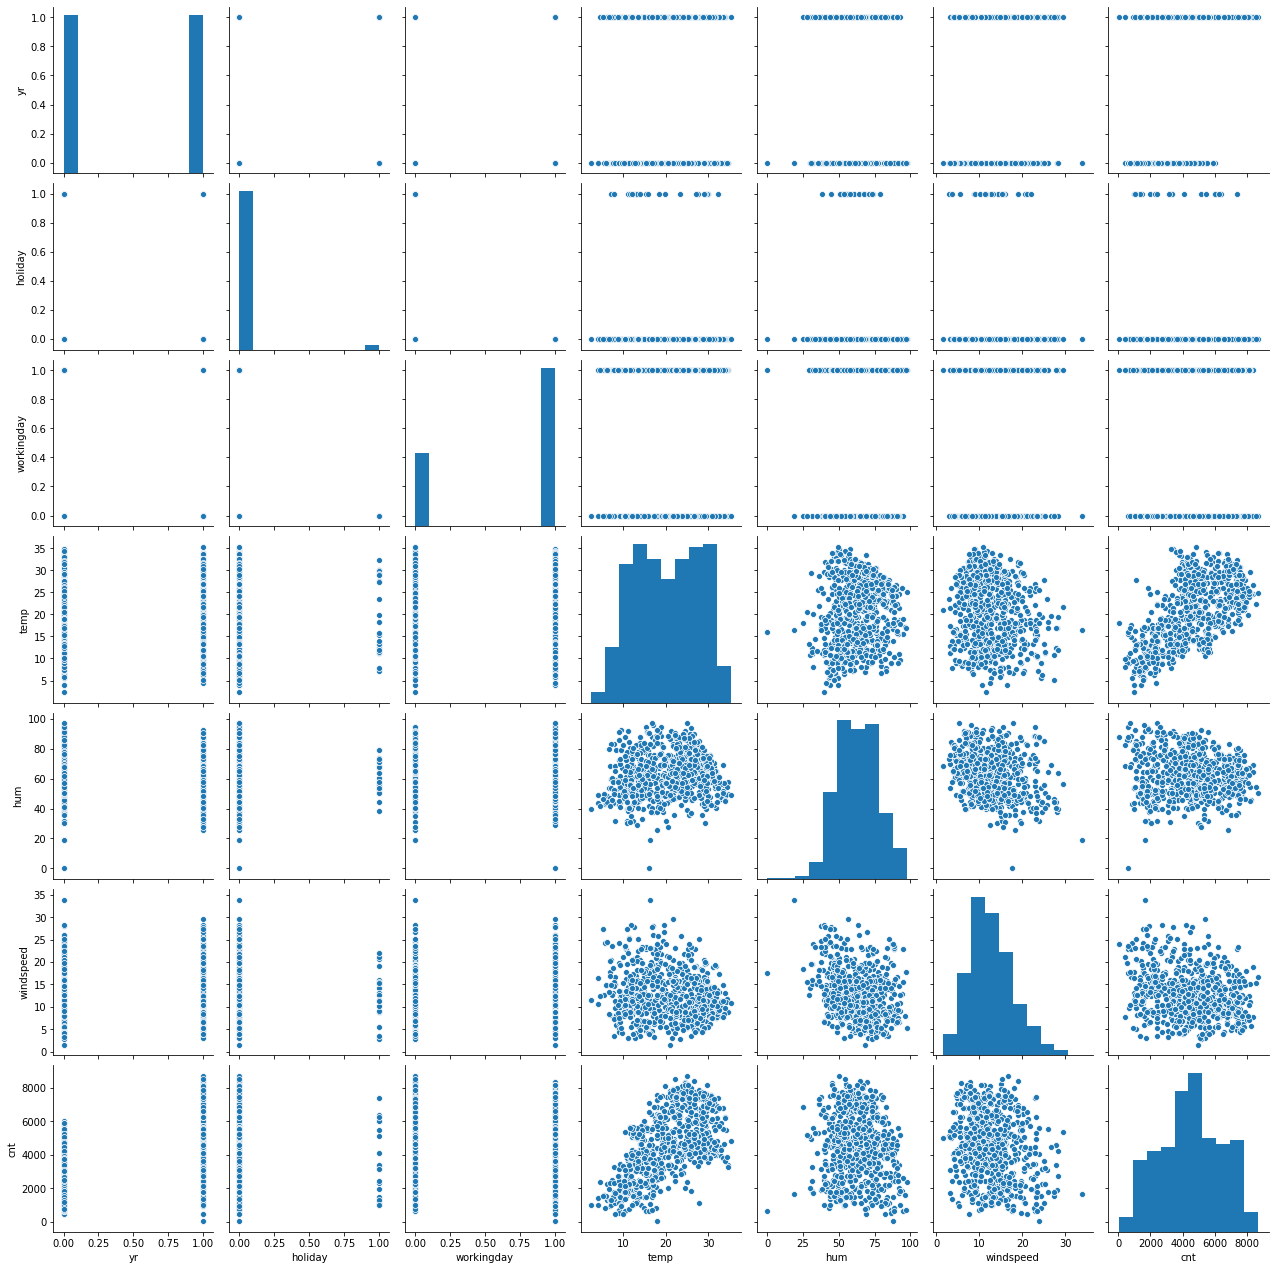

In [9]:
# Visualising the numerical variables

sns.pairplot(day)
plt.show()

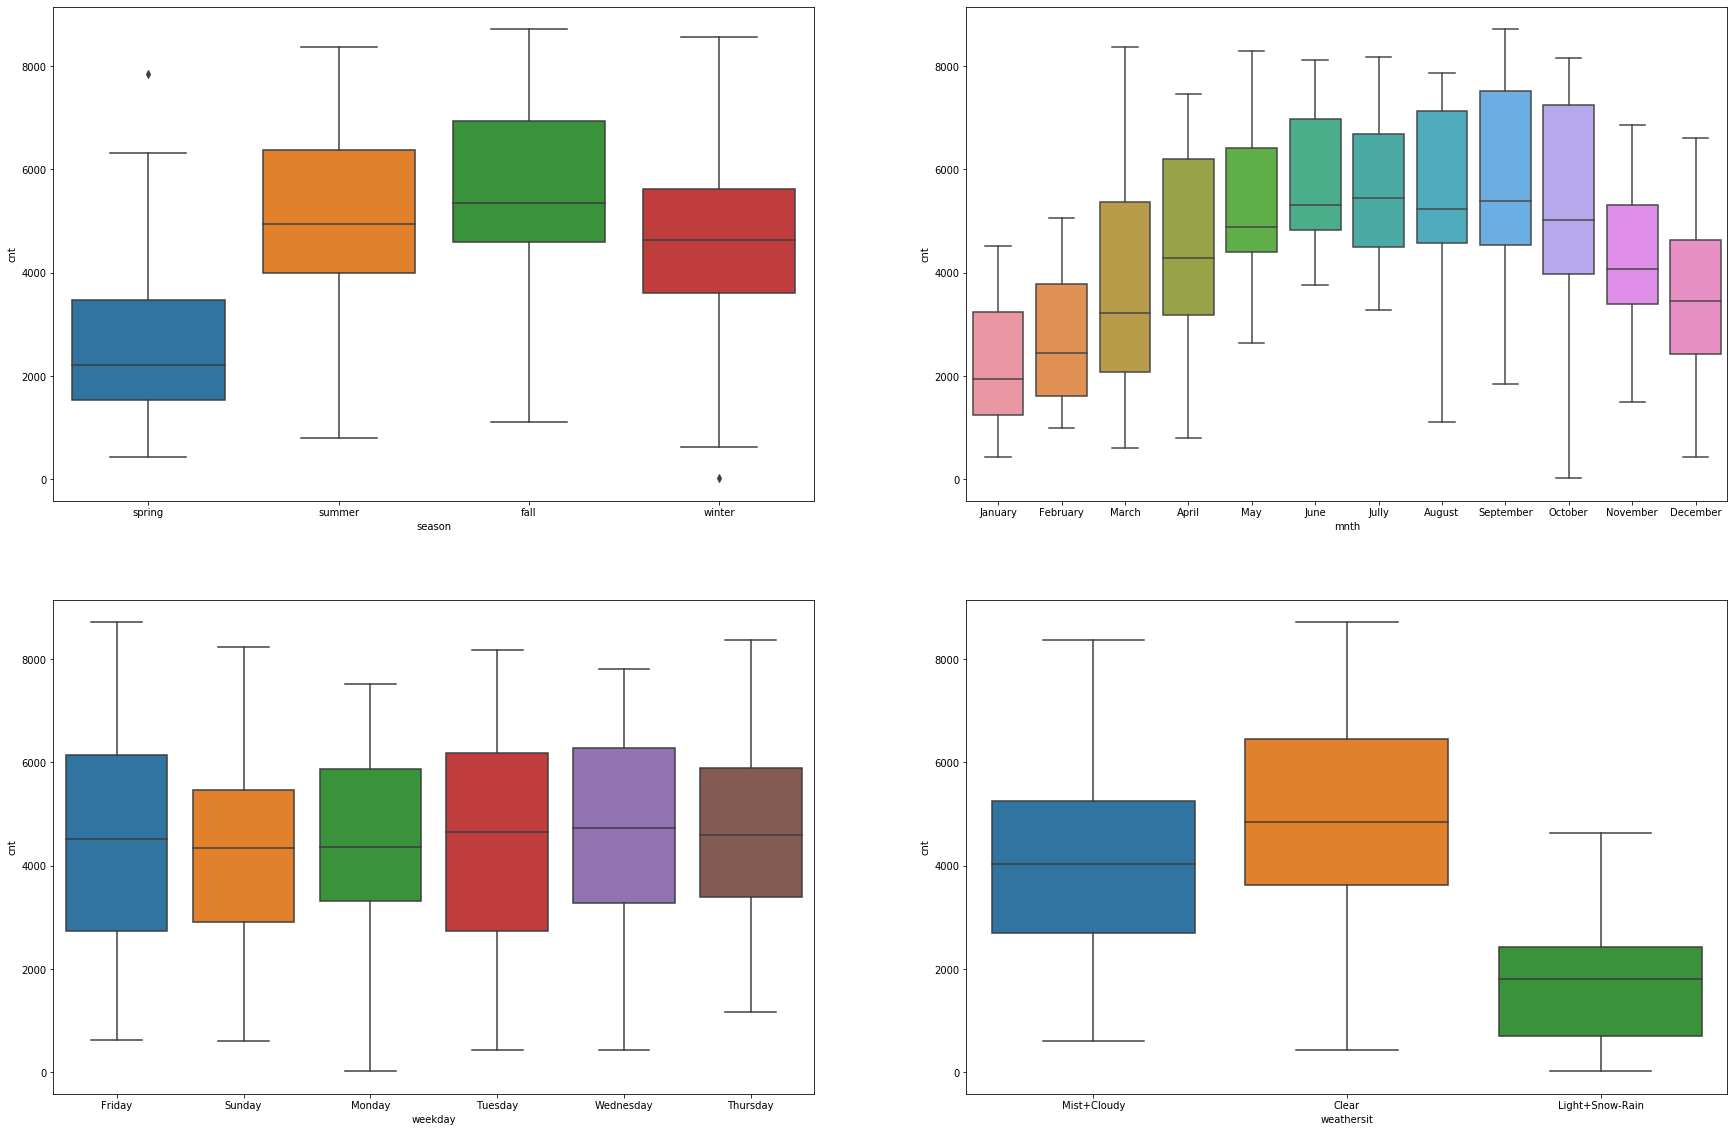

In [10]:
# Visualising the categorical variables

plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
sns.boxplot(x='season', y='cnt', data=day)

plt.subplot(2,2,2)
sns.boxplot(x='mnth', y='cnt', data=day)

plt.subplot(2,2,3)
sns.boxplot(x='weekday', y='cnt', data=day)

plt.subplot(2,2,4)
sns.boxplot(x='weathersit', y='cnt', data=day)

plt.show()

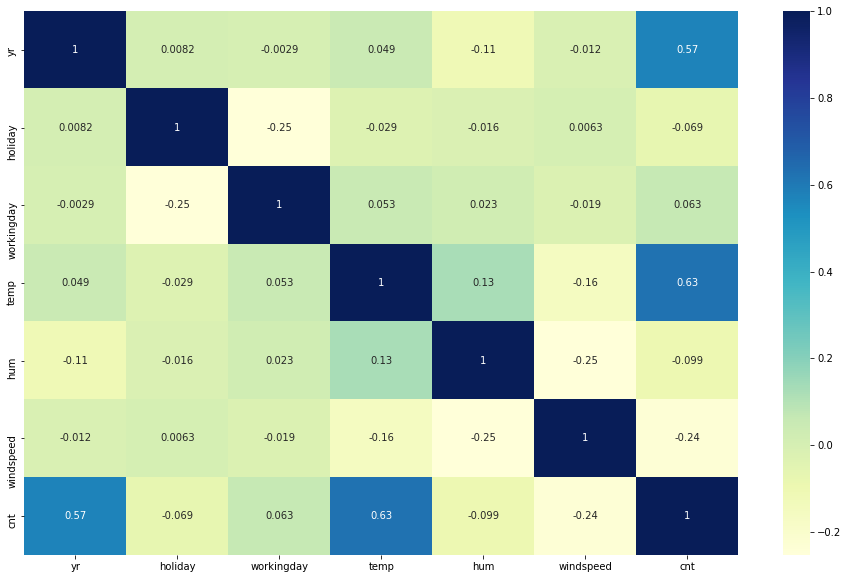

In [11]:
# Correlation 

plt.figure(figsize=(16,10))
sns.heatmap(day.corr(),annot=True,cmap='YlGnBu')
plt.show()

From the above heatmap, we can clearly see that the `temp` and `yr` variables are highly correlated with the target variable `cnt`.<br>

`workingday`, `windspeed`, `holiday` and `hum` variables have low correlation with the target variable `cnt`.

### Create Dummy Variables

In [12]:
# Create dummy variables for the 'season' column and store it in a new variable

dummy_season = pd.get_dummies(day['season'], drop_first=True)
dummy_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [13]:
# Create dummy variables for the 'mnth' column and store it in a new variable

dummy_mnth = pd.get_dummies(day['mnth'], drop_first=True)
dummy_mnth.head()

,August,December,February,January,Jully,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [14]:
# Create dummy variables for the 'weekday' column and store it in a new variable

dummy_weekday = pd.get_dummies(day['weekday'], drop_first=True)
dummy_weekday.head()

,Monday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0


In [15]:
# Create dummy variables for the 'weathersit' column and store it in a new variable

dummy_weathersit = pd.get_dummies(day['weathersit'], drop_first=True)
dummy_weathersit.head()

,Light+Snow-Rain,Mist+Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [16]:
# Add all the above dummy variables to the dataframe

day = pd.concat([day,dummy_season,dummy_mnth,dummy_weekday,dummy_weathersit], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,November,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Light+Snow-Rain,Mist+Cloudy
0,spring,0,January,0,Friday,0,Mist+Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist+Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,1,0,0,0,0,0,0
3,spring,0,January,0,NaN,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,January,0,Tuesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# Drop the 'season', 'mnth', 'weekday', 'weathersit' columns as we have created dummies for it

day = day.drop(['season','mnth','weekday','weathersit'], axis=1)
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,November,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Light+Snow-Rain,Mist+Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Step 4: Divide the data into train and test

In [18]:
day_train, day_test = train_test_split(day, train_size=0.7, random_state=100)
print(day_train.shape)
print(day_test.shape)

(510, 28)
(220, 28)


In [19]:
# Info of the 'day_train' datset

day_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   hum              510 non-null    float64
 5   windspeed        510 non-null    float64
 6   cnt              510 non-null    int64  
 7   spring           510 non-null    uint8  
 8   summer           510 non-null    uint8  
 9   winter           510 non-null    uint8  
 10  August           510 non-null    uint8  
 11  December         510 non-null    uint8  
 12  February         510 non-null    uint8  
 13  January          510 non-null    uint8  
 14  Jully            510 non-null    uint8  
 15  June             510 non-null    uint8  
 16  March            510 non-null    uint8  
 17  May           

In [20]:
# Info of the 'day_test' dataset

day_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               220 non-null    int64  
 1   holiday          220 non-null    int64  
 2   workingday       220 non-null    int64  
 3   temp             220 non-null    float64
 4   hum              220 non-null    float64
 5   windspeed        220 non-null    float64
 6   cnt              220 non-null    int64  
 7   spring           220 non-null    uint8  
 8   summer           220 non-null    uint8  
 9   winter           220 non-null    uint8  
 10  August           220 non-null    uint8  
 11  December         220 non-null    uint8  
 12  February         220 non-null    uint8  
 13  January          220 non-null    uint8  
 14  Jully            220 non-null    uint8  
 15  June             220 non-null    uint8  
 16  March            220 non-null    uint8  
 17  May           

### Rescaling

We will use Min-Max Scaling here.

We will perform scaling on 3 columns: 
- `temp`

- `hum`

- `windspeed`

In [21]:
# Instantiate an object
min_max = MinMaxScaler()

# Create a list of variables on which we have to perform scaling
variables = ['temp','hum','windspeed']

# Fit on data
day_train[variables] = min_max.fit_transform(day_train[variables])
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,November,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Light+Snow-Rain,Mist+Cloudy
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,1683,0,1,0,...,0,0,0,0,0,1,0,0,0,1


Here we did the Min-Max scaling for `temp`, `hum`, `windspeed` these variables.

In [22]:
day_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,November,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Light+Snow-Rain,Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,4485.337255,0.243137,0.247059,0.247059,...,0.086275,0.084314,0.080392,0.150980,0.143137,0.127451,0.158824,0.133333,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,1950.666077,0.429398,0.431725,0.431725,...,0.281045,0.278131,0.272166,0.358381,0.350557,0.333805,0.365870,0.340268,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing X and Y sets for model building

In [23]:
y_day_train = day_train.pop('cnt')
x_day_train = day_train

In [24]:
# Look at the head of the x_day_train

x_day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,August,...,November,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Light+Snow-Rain,Mist+Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [25]:
# Look at the head of the y_day_train

y_day_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

## Step 5: Data Modelling and Evaluation

### Building the model

We will use **LinearRegression** function from **sklearn** to use RFE(Recurssive Feature Elimination)

In [26]:
# Running RFE with the output number of variables equal to 

lm = LinearRegression()
lm.fit(x_day_train, y_day_train)

rfe = RFE(lm, 15)                # Running RFE
rfe = rfe.fit(x_day_train, y_day_train)

In [27]:
list(zip(x_day_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 5),
 ('December', False, 2),
 ('February', False, 3),
 ('January', True, 1),
 ('Jully', True, 1),
 ('June', False, 11),
 ('March', False, 13),
 ('May', False, 4),
 ('November', True, 1),
 ('October', False, 10),
 ('September', True, 1),
 ('Monday', False, 12),
 ('Sunday', True, 1),
 ('Thursday', False, 6),
 ('Tuesday', False, 8),
 ('Wednesday', False, 9),
 ('Light+Snow-Rain', True, 1),
 ('Mist+Cloudy', True, 1)]

In [28]:
# Look at the columns in our model

cols = x_day_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'January', 'Jully', 'November', 'September', 'Sunday',
       'Light+Snow-Rain', 'Mist+Cloudy'],
      dtype='object')

In [29]:
# Columns which are not in our model

x_day_train.columns[~rfe.support_]

Index(['workingday', 'August', 'December', 'February', 'June', 'March', 'May',
       'October', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### For the detailed statistics we will build model using `statsmodels` 

In [30]:
# Creating x_test dataframe with RFE selected variables
x_train_rfe = x_day_train[cols]

In [31]:
x_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,January,Jully,November,September,Sunday,Light+Snow-Rain,Mist+Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [32]:
# Adding a constant variable
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [33]:
# Building the model
lm = sm.OLS(y_day_train, x_train_rfe).fit()

In [34]:
# Look at the Summary of our model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.44e-191
Time:                        23:23:08   Log-Likelihood:                -4105.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     494   BIC:                             8311.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2670.7893    302.036      8.843      0.000    2077.356    3264.223
yr               2002.1298     69.468     28.821      0.000    1865.641    2138.619
holiday          -862.4464    220.515     -3.911      0.000   -1295.710    -429.183
temp             4365.8014    301.339     14.488      0.000    3773.738    4957.865
hum             -1383.6660    323.943     -4.271      0.000   -2020.143    -747.189
windspeed       -1597.8451    221.313     -7.220      0.000   -2032.675   -1163.015
spring           -479.4741    181.343     -2.644      0.008    -835.772    -123.176
summer            420.6519    129.549      3.247      0.001     166.118     675.186
winter            860.0073    153.504      5.603      0.000     558.406    1161.609
January          -305.2703    150.691     -2.026      0.043    -601.345      -9.196
Jully            -459.8999    156.758     -2.934      0.004    -767.894    -151.905
November         -207.3086    148.408     -1.397      0.163    -498.898      84.280
September         686.2977    143.797      4.773      0.000     403.768     968.827
Sunday           -393.7092     98.385     -4.002      0.000    -587.014    -200.405
Light+Snow-Rain -2157.9761    226.085     -9.545      0.000   -2602.182   -1713.770
Mist+Cloudy      -489.7161     89.897     -5.448      0.000    -666.344    -313.088
==============================================================================
Omnibus:                       64.570   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.609
Skew:                          -0.646   Prob(JB):                     2.97e-36
Kurtosis:                       5.456   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-squared value of our model is 0.849 and the Adj. R-squared value is 0.844 .

We can also see that all the columns have p-value less than 0.5 .So all the columns are significant in our model.

In [35]:
x_train_rfe = x_train_rfe.drop('const', axis=1)

In [36]:
x_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,January,Jully,November,September,Sunday,Light+Snow-Rain,Mist+Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [37]:
# Calculating the VIF for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = x_train_rfe
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
3,hum,29.32
2,temp,16.81
4,windspeed,4.72
5,spring,4.37
7,winter,3.78
6,summer,2.80
14,Mist+Cloudy,2.31
0,yr,2.09
8,January,1.67
10,November,1.60


We can see that the `hum` column has the high VIF 29.32 means they are highly correlated <br>
So we will drop that column from our model

In [38]:
# Dropping 'hum' column from our model
x_train_rfe = x_train_rfe.drop('hum', axis=1)

In [39]:
x_train_rfe.head()

,yr,holiday,temp,windspeed,spring,summer,winter,January,Jully,November,September,Sunday,Light+Snow-Rain,Mist+Cloudy
576,1,0,0.815169,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1


In [40]:
# Add constant
x_train_rfe = sm.add_constant(x_train_rfe)

In [41]:
# rebuilding the model
lm_2 = sm.OLS(y_day_train, x_train_rfe).fit()

In [42]:
# Look at the summary of the model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     189.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.29e-188
Time:                        23:23:08   Log-Likelihood:                -4114.8
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2003.0044    262.887      7.619      0.000    1486.493    2519.516
yr               2036.5267     70.191     29.014      0.000    1898.617    2174.436
holiday          -874.6706    224.305     -3.899      0.000   -1315.377    -433.964
temp             4039.6590    296.538     13.623      0.000    3457.030    4622.288
windspeed       -1332.1899    216.062     -6.166      0.000   -1756.701    -907.679
spring           -555.4887    183.584     -3.026      0.003    -916.189    -194.789
summer            367.0640    131.166      2.798      0.005     109.353     624.775
winter            723.8479    152.751      4.739      0.000     423.728    1023.968
January          -345.8924    152.988     -2.261      0.024    -646.478     -45.307
Jully            -414.5199    159.098     -2.605      0.009    -727.111    -101.929
November         -187.6359    150.898     -1.243      0.214    -484.116     108.844
September         636.1119    145.791      4.363      0.000     349.666     922.558
Sunday           -423.2991     99.835     -4.240      0.000    -619.453    -227.146
Light+Snow-Rain -2540.2336    211.203    -12.027      0.000   -2955.199   -2125.268
Mist+Cloudy      -710.2076     74.869     -9.486      0.000    -857.309    -563.107
==============================================================================
Omnibus:                       66.056   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.283
Skew:                          -0.656   Prob(JB):                     1.74e-37
Kurtosis:                       5.499   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-squared value of our model is 0.843 and the Adj. R-squared value is 0.839 .

In [43]:
# Drop the 'const'
x_train_rfe = x_train_rfe.drop('const', axis=1)

In [44]:
# Calculating the VIF for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = x_train_rfe
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
2,temp,5.20
3,windspeed,4.67
4,spring,2.79
6,winter,2.32
5,summer,2.25
0,yr,2.07
7,January,1.61
9,November,1.60
8,Jully,1.59
13,Mist+Cloudy,1.57


We can see that `temp` column has the 5.20 VIF i.e. greater than 5. <br>
So we will drop `temp` column from our model.

In [45]:
# Drop 'temp' column from the model
x_train_rfe = x_train_rfe.drop('temp', axis=1)

In [46]:
x_train_rfe.head()

,yr,holiday,windspeed,spring,summer,winter,January,Jully,November,September,Sunday,Light+Snow-Rain,Mist+Cloudy
576,1,0,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.380981,0,1,0,0,0,0,0,0,0,1


In [47]:
# Add constant
x_train_rfe = sm.add_constant(x_train_rfe)

In [48]:
# rebuilding the model
lm_3 = sm.OLS(y_day_train, x_train_rfe).fit()

In [49]:
# Look at the summary of the model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.17e-155
Time:                        23:23:08   Log-Likelihood:                -4196.0
No. Observations:                 510   AIC:                             8420.
Df Residuals:                     496   BIC:                             8479.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5187.0177    140.959     36.798      0.000    4910.067    5463.968
yr               2149.9140     81.641     26.334      0.000    1989.510    2310.318
holiday          -830.1351    262.718     -3.160      0.002   -1346.313    -313.957
windspeed       -1572.6691    252.244     -6.235      0.000   -2068.268   -1077.070
spring          -2287.1749    155.155    -14.741      0.000   -2592.017   -1982.333
summer           -392.6876    139.065     -2.824      0.005    -665.917    -119.458
winter           -497.2106    144.885     -3.432      0.001    -781.875    -212.546
January          -886.7586    173.067     -5.124      0.000   -1226.794    -546.723
Jully             -98.6691    184.375     -0.535      0.593    -460.922     263.584
November         -510.3625    174.568     -2.924      0.004    -853.345    -167.380
September         563.4616    170.663      3.302      0.001     228.150     898.773
Sunday           -431.0943    116.943     -3.686      0.000    -660.860    -201.329
Light+Snow-Rain -2667.5556    247.157    -10.793      0.000   -3153.160   -2181.952
Mist+Cloudy      -773.8561     87.530     -8.841      0.000    -945.831    -601.881
==============================================================================
Omnibus:                       38.135   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.499
Skew:                          -0.452   Prob(JB):                     4.03e-17
Kurtosis:                       4.655   Cond. No.                         9.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-squared value of our model is 0.784 and the Adj. R-squared value is 0.778 .

In [50]:
x_train_rfe = x_train_rfe.drop('const', axis=1)

In [51]:
# Calculating the VIF for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = x_train_rfe
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
2,windspeed,3.90
3,spring,2.78
5,winter,2.25
4,summer,2.04
0,yr,1.84
6,January,1.60
8,November,1.59
12,Mist+Cloudy,1.53
7,Jully,1.21
9,September,1.17


Now we can see that all variables has the VIF less than 5.

## Residual Analysis on Training Dataset

We have to check the error terms are normally distributed. It is the assumption of the Multiple Linear Regression.

In [52]:
# Add constant
x_train_rfe = sm.add_constant(x_train_rfe)

In [53]:
y_train_pred = lm_3.predict(x_train_rfe)

In [54]:
residual = y_day_train - y_train_pred

Text(0.5, 0, 'Errors')

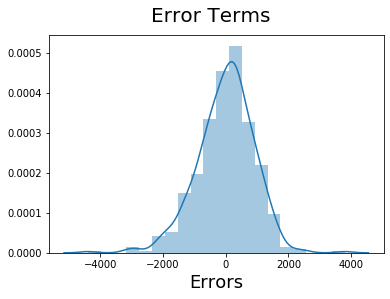

In [55]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)             

In [56]:
day_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,November,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Light+Snow-Rain,Mist+Cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,0,1,0,0,0,0,0,1,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
numvars = ['temp','hum','windspeed']
day_test[numvars] = min_max.transform(day_test[numvars])
day_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,November,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Light+Snow-Rain,Mist+Cloudy
184,0,1,0,0.831783,0.657364,0.084219,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,2659,0,0,1,...,0,1,0,0,0,0,0,1,0,1
221,0,0,1,0.881625,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,4968,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
# Splitting test data into x and y
y_day_test = day_test.pop('cnt')
x_day_test = day_test

In [59]:
x_train_rfe.columns

Index(['const', 'yr', 'holiday', 'windspeed', 'spring', 'summer', 'winter',
       'January', 'Jully', 'November', 'September', 'Sunday',
       'Light+Snow-Rain', 'Mist+Cloudy'],
      dtype='object')

In [60]:
# dropping the columns in the test set as per the columns in trained model
x_day_test = x_day_test[x_train_rfe.columns[1:]]
x_day_test.head()

,yr,holiday,windspeed,spring,summer,winter,January,Jully,November,September,Sunday,Light+Snow-Rain,Mist+Cloudy
184,0,1,0.084219,0,0,0,0,1,0,0,0,0,1
535,1,0,0.153728,0,1,0,0,0,0,0,0,0,0
299,0,0,0.334206,0,0,1,0,0,0,0,0,0,1
221,0,0,0.339570,0,0,0,0,0,0,0,0,0,0
152,0,0,0.537414,0,1,0,0,0,0,0,0,0,0


In [61]:
# Add Constant
x_day_test = sm.add_constant(x_day_test)

In [62]:
y_pred = lm_3.predict(x_day_test)

## Model Evaluation

Text(0, 0.5, 'y_pred')

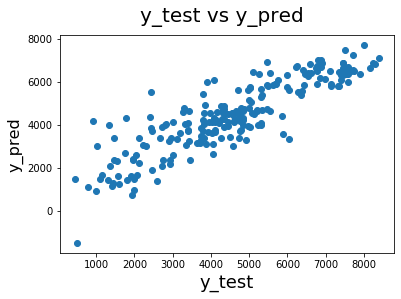

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_day_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

In [66]:
from sklearn.metrics import r2_score
r2_squared = r2_score(y_day_test, y_pred)
round(r2_squared, 2)

0.76

The R-squared score of train model was 0.784 and the R-squared score of test model dataset is 0.76 .

#### Our Multiple Linear Regression Model

y = 2149.9140 * yr + (-830.1351) * holiday + (-1572.6691) * windspeed + (-2287.1749) * spring + (-392.6876) * summer + (-497.2106) * winter + (-886.7586) * January + (-98.6691) * Jully + (-510.3625) * November + (563.4616) * September + (-431.0943) * Sunday + 	(-2667.5556) * Light+Snow-Rain + (-773.8561) * Mist+Cloudy	